In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt; import seaborn as sns
rng = np.random.default_rng(42)

# Dataset sintético
n = 500
df = pd.DataFrame({
    "age": rng.normal(38, 9, n).clip(18, 70),
    "income": rng.normal(52000, 14000, n).clip(12000, 120000),
    "purchases": rng.poisson(6, n),
    "segment": rng.choice(["A","B","C"], n, p=[0.4,0.4,0.2])
})

In [3]:
# Ex.1 — Centrais & Dispersão
desc = df[["age","income","purchases"]].describe().T
desc[["mean","50%","std","min","max"]]

,mean,50%,std,min,max
age,37.892895,38.028906,8.612576,18.0,64.224762
income,51402.021688,52122.234837,14172.812066,12000.0,96503.951511
purchases,5.938000,6.000000,2.525651,0.0,16.000000


In [4]:
# Ex.2 - Outliers (IQR)
q1,q3 = df["income"].quantile([0.25,0.75])
iqr = q3-q1
low, high = q1-1.5*iqr, q3+1.5*iqr
outliers = df[(df["income"]<low)|(df["income"]>high)]
outliers.shape[0], low, high

(4, 14104.001572151003, 88087.42463713145)

In [5]:
# Ex.3 Correlacao (Pearson/Spearman)
df[["age","income","purchases"]].corr(method="pearson"), df[["age","income","purchases"]].corr(method="spearman")

(                age    income  purchases
 age        1.000000 -0.008128  -0.005552
 income    -0.008128  1.000000   0.037086
 purchases -0.005552  0.037086   1.000000,
                 age    income  purchases
 age        1.000000  0.011914  -0.017828
 income     0.011914  1.000000   0.036305
 purchases -0.017828  0.036305   1.000000)

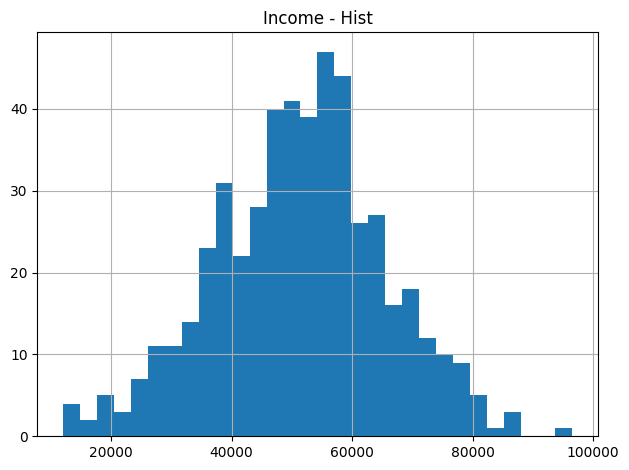

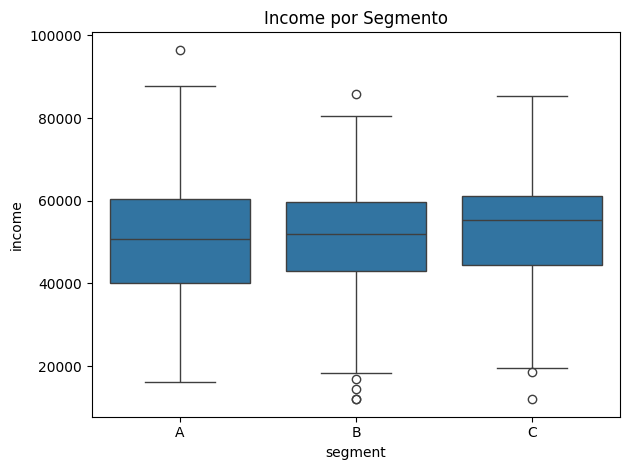

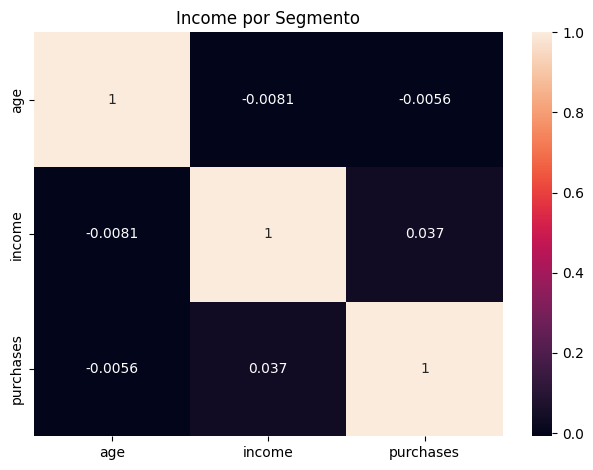

In [7]:
# Ex.4 Graficos
df["income"].hist(bins=30)

## PRIMEIRO GRAFICO . INCOME HIST
plt.title("Income - Hist");
plt.tight_layout()
plt.savefig("../../docs/2025-08-13_01_income_hist.png", dpi=150, bbox_inches="tight")
plt.show()

## SEGUNDO GRAFICO - INCOME SEGMENT
sns.boxplot(x="segment", y="income", data=df)
plt.title("Income por Segmento")
plt.tight_layout()
plt.savefig("../../docs/2025-08-13_01_income_box.png", dpi=150, bbox_inches="tight")
plt.show()

## TERCEIRO GRAFICO - CORRELACAO
sns.heatmap(df[["age","income","purchases"]].corr(), annot=True)
plt.title("Correlacao");plt.title("Income por Segmento")
plt.tight_layout()
plt.savefig("../../docs/2025-08-13_01_income_heatmap.png", dpi=150, bbox_inches="tight")
plt.show()

In [8]:
# Ex.5 - Missing & Imputcao simples (quick)
df2 = df.copy()
df2.loc[rng.choice(df2.index, 25, replace=False), "income"] = np.nan
df2["income"].isna().mean(), df2["income"].fillna(df2["income"].median()).isna().mean()

(np.float64(0.05), np.float64(0.0))